# Maria's part of the project...

In [1]:
#dependencies EVERYTHHING... just in case!
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
#Study data files
nashville_path ="Resources/Nash_listings (3).csv"
nyc_path = "Resources/NYC_listings (2).csv"

nashville_data_df = pd.read_csv(nashville_path)
nyc_data_df = pd.read_csv(nyc_path)

#Display the data for preview
print(nashville_data_df.shape)
nashville_data_df.count()

(8584, 18)


id                                8584
name                              8584
host_id                           8584
host_name                         8584
neighbourhood_group                  0
neighbourhood                     8584
latitude                          8584
longitude                         8584
room_type                         8584
price                             8584
minimum_nights                    8584
number_of_reviews                 8584
last_review                       7447
reviews_per_month                 7447
calculated_host_listings_count    8584
availability_365                  8584
number_of_reviews_ltm             8584
license                             10
dtype: int64

In [3]:
#Display the data for preview (clean?)
nashville_data_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6422.0,Home in Nashville · ★4.95 · 1 bedroom · 1 bed ...,12172,Michele,NaN,District 6,36.17143,-86.73570,Private room,43,30,674,3/3/2020,3.85,1,227,0,NaN
1,39870.0,Home in Nashville · ★4.94 · 1 bedroom · 1 bed ...,171184,Evelyn,NaN,District 25,36.12466,-86.81269,Private room,70,1,401,9/12/2023,4.70,1,212,73,NaN
2,59576.0,Home in Nashville · 1 bedroom · 1 bed · 1 priv...,812128,Patricia And John,NaN,District 12,36.18940,-86.59162,Private room,45,30,2,9/14/2022,0.13,9,89,0,NaN
3,72906.0,Rental unit in Nashville · ★4.91 · 2 bedrooms ...,176117,Richard,NaN,District 18,36.13122,-86.80066,Entire home/apt,119,2,702,9/3/2023,4.70,1,47,44,NaN
4,258817.0,Home in Nashville · ★4.77 · 1 bedroom · 2 beds...,22296,Diana,NaN,District 12,36.16076,-86.59151,Private room,39,30,96,12/14/2019,0.67,7,289,0,NaN


In [4]:
print(nyc_data_df.shape)
nyc_data_df.count()

(38792, 18)


id                                38792
name                              38792
host_id                           38792
host_name                         38787
neighbourhood_group               38792
neighbourhood                     38792
latitude                          38792
longitude                         38792
room_type                         38792
price                             38792
minimum_nights                    38792
number_of_reviews                 38792
last_review                       28440
reviews_per_month                 28440
calculated_host_listings_count    38792
availability_365                  38792
number_of_reviews_ltm             38792
license                            2939
dtype: int64

room_type
Entire home/apt    7757
Private room        798
Hotel room           22
Shared room           7
Name: count, dtype: int64


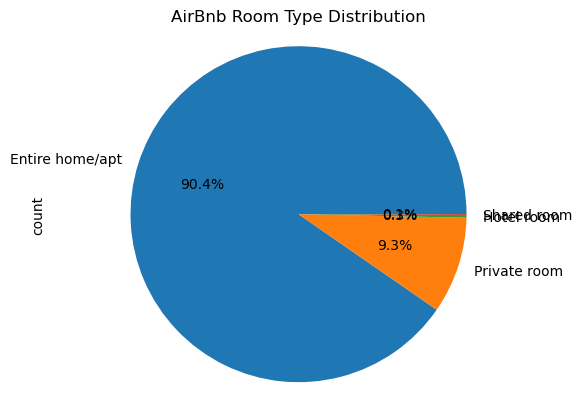

In [5]:
nashville_type_s = nashville_data_df['room_type'].value_counts()
nashville_type_s.plot(kind='pie',autopct="%1.1f%%")

plt.axis('equal')
plt.title("Nashville: Room Type Distribution")
plt.show

print(nashville_type_s)

room_type
Entire home/apt    21319
Private room       16849
Shared room          492
Hotel room           132
Name: count, dtype: int64


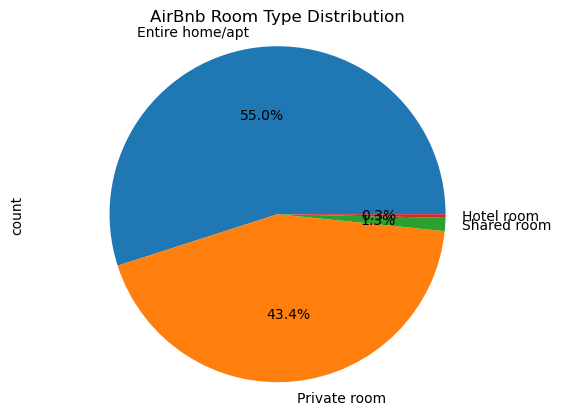

In [6]:
nyc_type_s = nyc_data_df['room_type'].value_counts()
nyc_type_s.plot(kind='pie',autopct="%1.1f%%")

plt.axis('equal')
plt.title("New York: Room Type Distribution")
plt.show

print(nyc_type_s)

In [29]:
#labels =  [Entire home/apt, Hotel room, Shared room, Private room]
labels = nyc_data_df['room_type'].unique()
print(labels)

['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


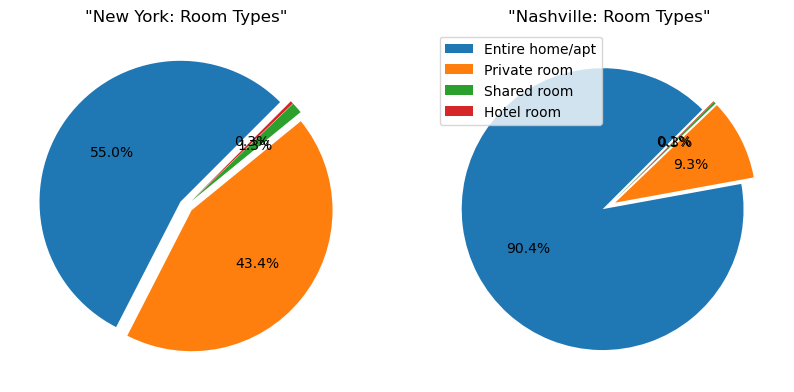

In [60]:
#Plot a pie graph for NYC data
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to your two pies
explode = [0.05,0.05,0.05,0.05]

labels = nyc_data_df['room_type'].unique()
types = nyc_data_df['room_type'].value_counts()

labels2 = nashville_data_df['room_type'].unique()
types2 = nashville_data_df['room_type'].value_counts()

ax1.pie(types,explode=explode,startangle=45, autopct = '%1.1f%%') #plot first pie
ax1.set_title('"New York: Room Types"')

ax2.pie(types2,explode=explode, startangle=45, autopct = '%1.1f%%') #plot second pie
ax2.set_title('"Nashville: Room Types"')

#plt.legend(labels, loc="best")
#patches, texts = plt.pie(types)
#plt.legend(patches1 + patches2, [f'{label} ({percent:.1f}%)' for label, percent in zip(labels, types_nyc + types_nash)], loc="best")
plt.legend(patches, labels, loc="upper left")

plt.show()

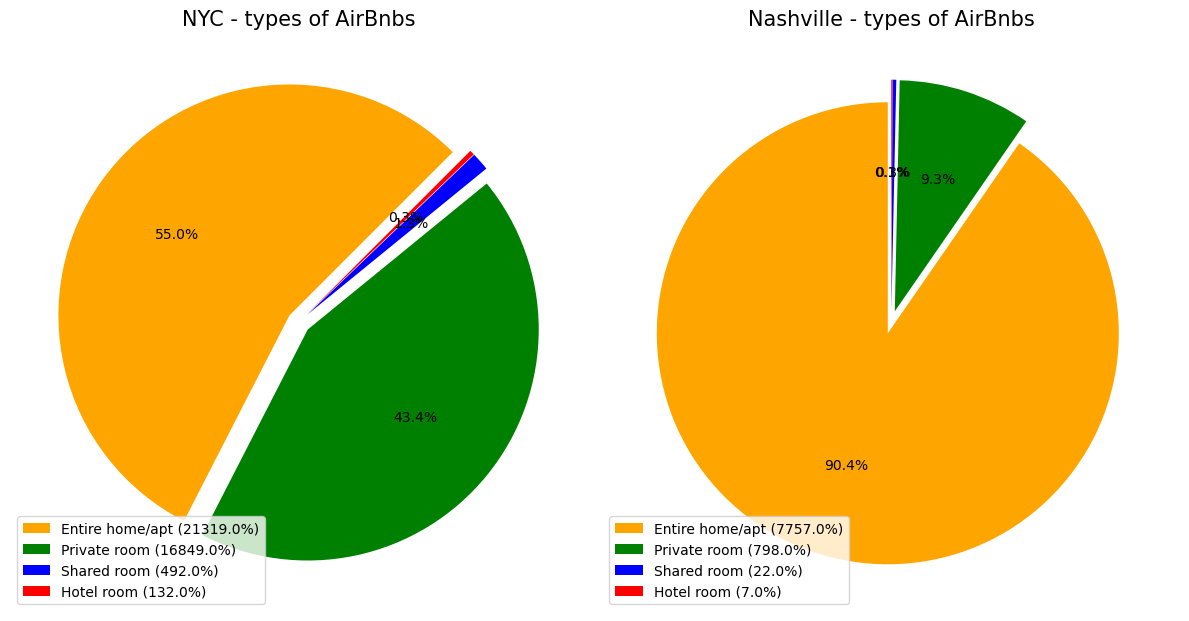

In [74]:
colors = ['orange', 'green', 'blue','red']
explode = [0.05, 0.05, 0.05, 0.05]

# Example data for the first pie chart
type_nyc = nyc_data_df['room_type'].value_counts()
labels1 = nyc_data_df['room_type'].unique()

# Example data for the second pie chart
type_nash = nashville_data_df['room_type'].value_counts()
labels2 = nyc_data_df['room_type'].unique()

# Create a figure with two subplots in a single row
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed

# First pie chart on the left
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
patches1, texts1, autotexts1 = plt.pie(type_nyc, colors=colors, explode = explode, startangle=45, autopct='%1.1f%%')
plt.legend(patches1, [f'{label} ({percent:.1f}%)' for label, percent in zip(labels1, type_nyc)], loc="lower left")
plt.title("NYC - types of AirBnbs", fontsize=15)

# Second pie chart on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
patches2, texts2, autotexts2 = plt.pie(type_nash, colors=colors, explode = explode, startangle=90, autopct='%1.1f%%')
plt.legend(patches2, [f'{label} ({percent:.1f}%)' for label, percent in zip(labels2, type_nash)], loc="lower left")
plt.title("Nashville - types of AirBnbs", fontsize=15)

# Adjust the layout
plt.tight_layout()

# Display the pie charts
plt.show()


(0.0, 6000.0)

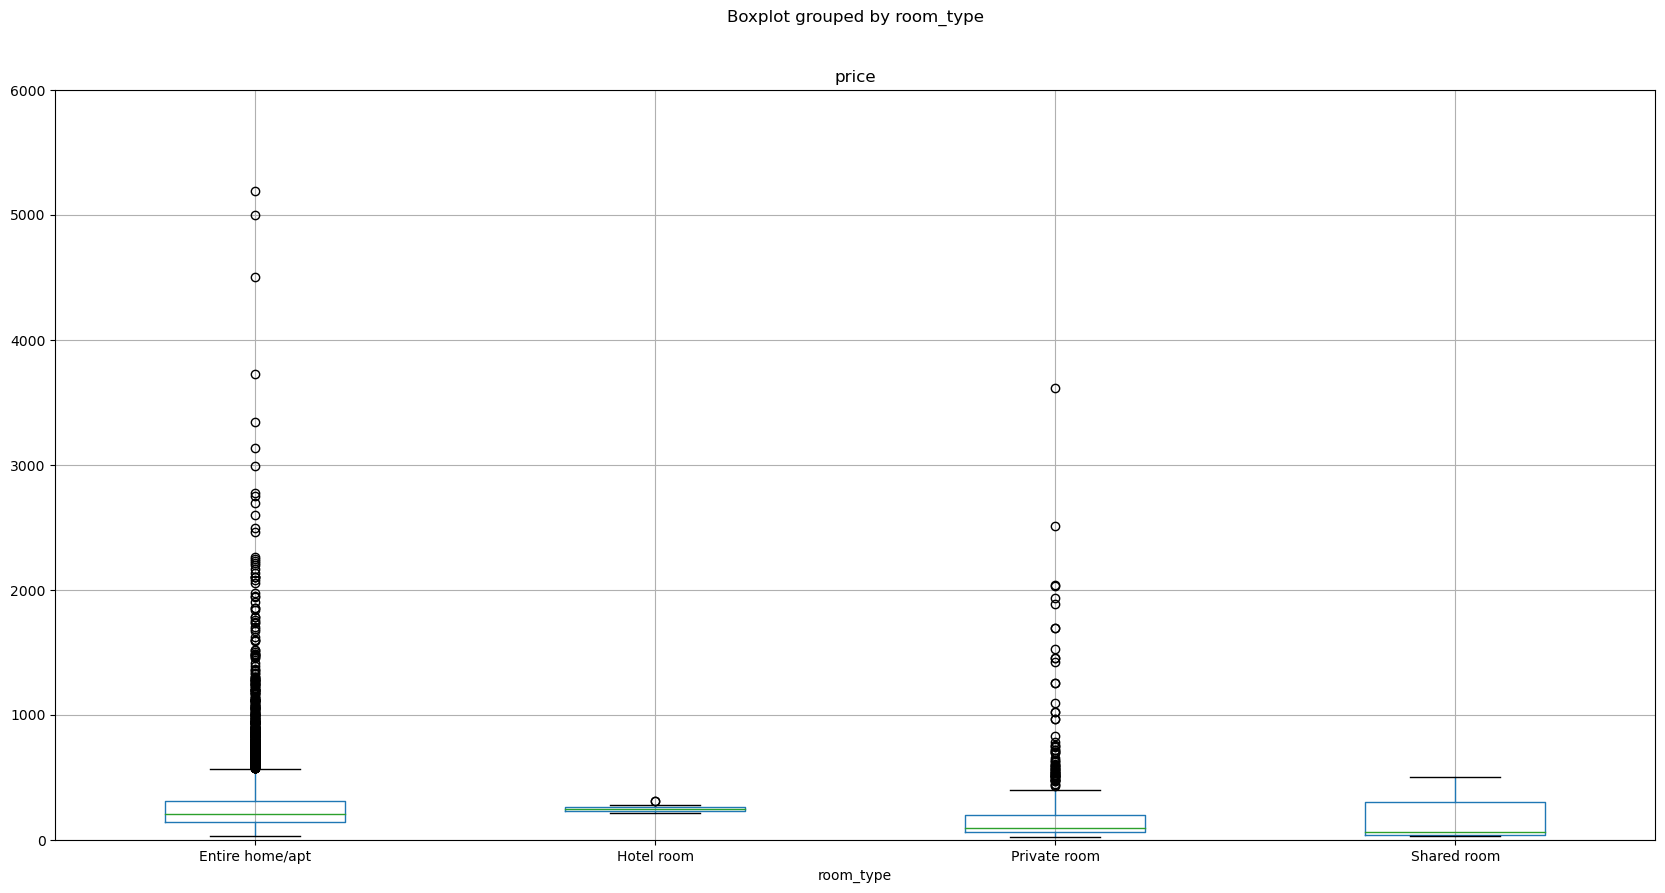

In [78]:
#Average cost per dwelling???
# Create a boxplot to compare means
nashville_data_df.boxplot("price", by="room_type", figsize=(20, 10))
plt.ylim(0, 6000)


In [ ]:
labels1 = nyc_data_df['room_type'].unique()

In [87]:
nashville_data_df['price']['room_type'].mean()


KeyError: 'room_type'

In [ ]:
# Extract individual groups
group0 = df[df["num_workouts"] == 0]["pain_tolerance"]
group1 = df[df["num_workouts"] == 1]["pain_tolerance"]
group2 = df[df["num_workouts"] == 2]["pain_tolerance"]
group3 = df[df["num_workouts"] == 3]["pain_tolerance"]
group4 = df[df["num_workouts"] == 4]["pain_tolerance"]